# Titanic Challenge

### Importando as Bibliotecas

In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

test = pd.read_csv("CSV'S/test.csv")
train= pd.read_csv("CSV'S/train.csv")
test_ids = test["PassengerId"]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [432]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Analise dos dados

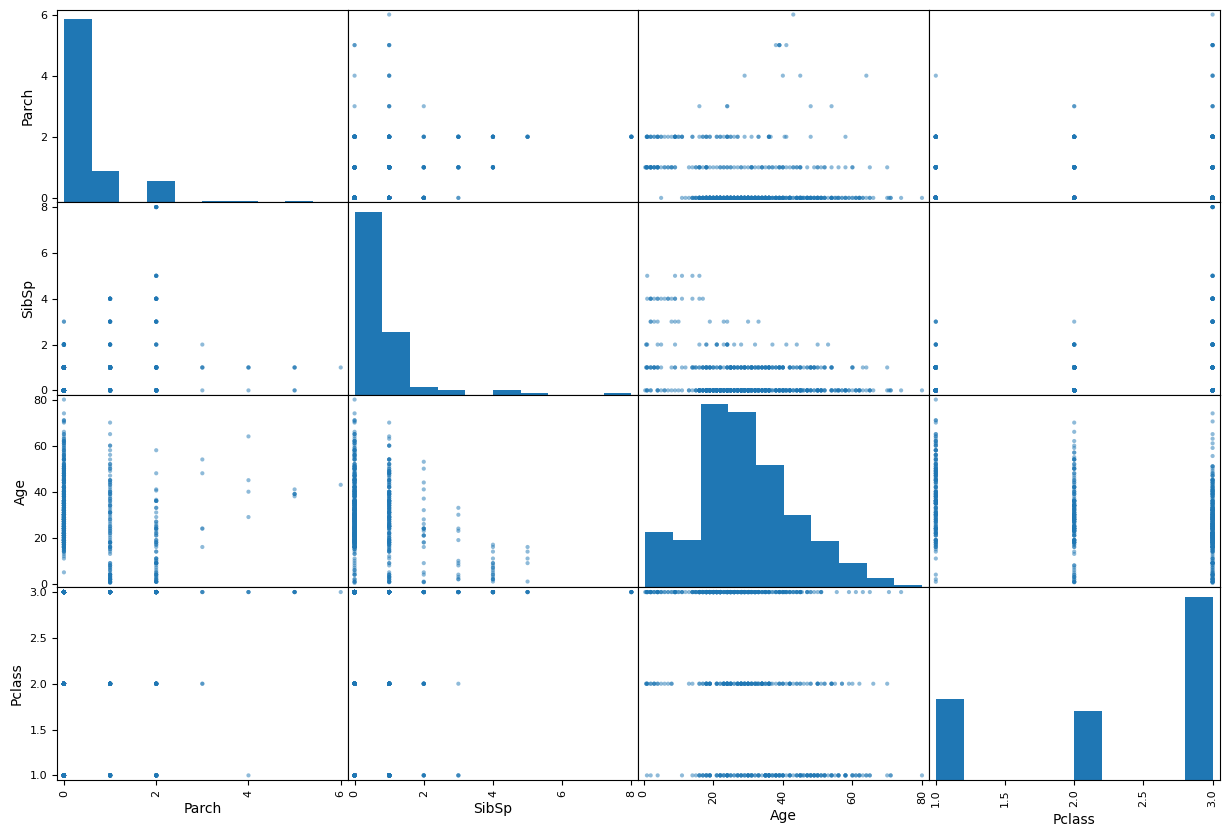

In [436]:
colunms= ['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[colunms], figsize=(15, 10));

## Tratamento dos dados

|Variavel	|                Definição	                    |                     Chave                    |
|-----------|-----------------------------------------------|----------------------------------------------|
|Survived	| sobreviventes	                                |    0 = Não, 1 = Sim                          |
|pclass	    | Classe do Ticket	                            |    1 = 1st, 2 = 2nd, 3 = 3rd                 |
|sex	    | Sexo                                          |    0 = mulher, 1 = homem                     |
|Age	    | Idade em anos  	                            |                                              |
|sibsp	    | # Número de irmãos/cônjuges a bordo do Titanic|	                                           |
|parch	    | # de pais/filhos a bordo do Titanic           |                                              |
|ticket	    | Número do ticket	                            |                                              |
|fare	    | Tarifa do passageiro	                        |                                              |
|cabin	    | Número da cabine	                            |                                              |
|embarked	| Porto que embarcou	                        |C = Cherbourg, Q = Queenstown, S = Southampton|


### Limpeza dos Data Frame

In [ ]:
df1 = train.drop(['Name',"PassengerId",'Ticket','Cabin'], axis=1)
testData = test.drop(['Name',"PassengerId", 'Ticket', 'Cabin'], axis=1)
testData.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
# Convertendo strings para valores númericos
df1['Sex'] = df1['Sex'].map({'female':0, 'male':1})
df1['Embarked'] = df1['Embarked'].map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
testData['Sex'] = testData['Sex'].map({'female': 0, 'male': 1})
testData['Embarked'] = testData['Embarked'].map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})

In [ ]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
testData.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

### Limpeza dos dados nulos

In [ ]:
# Variaveis para armazenar a idade média de cada sexo
idadeMediaHomem0 = df1[df1['Sex']==1]['Age'].median()
idadeMediaMulher0 = df1[df1['Sex']==0]['Age'].median()
# Atribui o valor de idade média aos passageiros que possuem a idade como nula
df1.loc[(df1.Age.isnull()) & (df1['Sex']==1),'Age'] = idadeMediaHomem0
df1.loc[(df1.Age.isnull()) & (df1['Sex']==0),'Age'] = idadeMediaMulher0
idadeMediaHomem1 = testData[testData['Sex'] == 1]['Age'].median()
idadeMediaMulher1 = testData[testData['Sex'] == 0]['Age'].median()
testData.loc[(testData.Age.isnull()) & (testData['Sex'] == 1), 'Age'] = idadeMediaHomem1
testData.loc[(testData.Age.isnull()) & (testData['Sex'] == 0), 'Age'] = idadeMediaMulher1

df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
# verificando quais são os dois passassageiros com embarked nulo
EmbarkedNulo = df1[df1.Embarked.isnull()]
EmbarkedNulo

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,0,38.0,0,0,80.0,NaN
829,1,1,0,62.0,0,0,80.0,NaN


In [ ]:
# Atribuindo um valor
df1 = df1.fillna(2)

In [ ]:
# Preenchendo valores nulos na tarifa com a mediana
tarifaMedia = testData['Fare'].median()
testData.loc[testData.Fare.isnull(), 'Fare'] = tarifaMedia

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Y = df1["Survived"]
X = df1.drop("Survived", axis=1)

X_train, X_val, y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

clf= LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
predictions = clf.predict(X_val)
from sklearn.metrics import accuracy_score
a= accuracy_score(Y_val, predictions)
print(a*100)

79.88826815642457


In [ ]:
submission_preds = clf.predict(testData)

df= pd.DataFrame({"PassengerId": test_ids, 
                  "Survived": submission_preds})
df.to_csv("submission.csv", index=False)